# Naive Bayes Classifier from Scratch

## Part 1: Base code

Instructions
1. Do **not** shuffle the data set
2. Treat the features as nominal and use them as provided (e.g., do **not** convert them to other feature types, such as numeric ones). Implement a Naive Bayes classifier with appropriate likelihood function for the data.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms. You must use epsilon smoothing strategy as discussed in the Naive Bayes lecture. 
4. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation.
5. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)*
6. Please place the jupyter notebook into the same folder as the input data.


In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import metrics 

C:\Users\hana3\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# This function should open a csv file and read the data into a useable format [0.5 mark]
def preprocess(filename):
    
    # Stripping and splitting raw data
    instances = []
    with open(filename, mode='r') as raw_data:  
        for instance in raw_data: ##
            instances.append(instance.strip().split(",")[1:])
    
    # Converting data into pandas Data Frame format
    header = instances[0]
    data_df = pd.DataFrame(instances[1:], columns= header) 
    
    return data_df

In [3]:
# This function should build a supervised NB model [3 marks]
def train(train_data):
    
    Y_label = Y_label = train_data.columns[-1] # Getting the label of the last column   
    classes = sorted(Counter(train_data[Y_label])) # Creating a list of classes 
    attributes = list(train_data.columns[:-1]) # Creating a list of attributes
    epsilon = (1/len(train_data))/100 # Defining value of epsilon for the smoothing

    priors = {}  # Creating a dictionary for prior probabilities per class
    counting = Counter(train_data[Y_label]) # Counting classes
    counts_per_class = dict(sorted(counting.items())) # sorting the counts dictionary according to the 'classes' list

    likelihoods = [] # Creating a list for the likelihoods per class per attribute
    for c in classes:

        # Calculating prior probabilities per class
        priors[c] = counts_per_class.get(c)/len(train_data) ###

        # Calculating the likelihoods per class per attribute per attribute value
        like_per_att = []
        class_rows = train_data.loc[train_data[Y_label] == c] # filtering rows of each class
        for att in attributes:
            att_values = sorted(list(train_data[att].unique())) # list of attribute values for each attribute
            counts_per_att = Counter(class_rows[att]) # counting attribute values per attribute

            counts_per_att_with_ceros = {}
            like_per_att_value = {}
            for a_value in att_values:
                counts_per_att_with_ceros[a_value] = counts_per_att[a_value] # adding unseen attribute values to the dictionary
                like_per_att_value[a_value] = counts_per_att_with_ceros[a_value] / counts_per_class[c] # likelihood per attribute value

                if  like_per_att_value[a_value] == 0:  # Applying epsilon smoothing
                    like_per_att_value[a_value] = float(epsilon)  

            like_per_att.append(like_per_att_value)
        likelihoods.append(like_per_att)

    return (classes, priors, likelihoods)

In [4]:
# This function should predict the class for a set of instances, based on a trained model [1.5 marks]
def predict(classes, priors, likelihoods, X_test):
    
    final_probs_per_class = []
    predictions = []
    for i in range(len(X_test)):
        
        # Creating a list for final probabilities per class
        final_probs = [] 
        for c in range(len(classes)): 
            
            # Calculating the final probability of the test instance per class
            final_prob = np.log(priors[classes[c]])
            for att in range(len(X_test[0])):
                final_prob += np.log(likelihoods[c][att][X_test[i][att]])

            final_probs.append(final_prob)
        
        # Appending predicted probabilities per class
        final_probs_per_class.append(final_probs)
        
        # Choosing the class with the maximum final probability
        predictions.append(classes[final_probs.index(max(final_probs))]) 
    
    return (final_probs_per_class, predictions)

In [5]:
# This function should evaluate a set of predictions [1 mark]
def evaluate(classes, Y_predicted, Y_true):
    
    accuracy = metrics.accuracy_score(Y_true, Y_predicted) # Calculating accuracy score
    error_rate = 1 - accuracy # Calculating error rate
 
    if len(classes) == 2: # if binary
        f_score_1 = metrics.f1_score(Y_true, Y_predicted, pos_label = classes[0], average = 'binary') # Calculating f score with beta = 1 for binary outcome
    
    else: # if multiclass
        f_score_1 = metrics.f1_score(Y_true, Y_predicted, average = 'weighted') # I used weighted average here to account for class imbalance

    conf_matrix = metrics.confusion_matrix(Y_true, Y_predicted) # Creating the confusion matrix
    
    return (accuracy, error_rate, f_score_1, conf_matrix)

## Bank Marketing

In [6]:
# This cell should act as your "main" function where you call the above functions 
# on the full Bank Marketing data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the Bank Marketing data

bank_marketing = preprocess('bank-marketing.csv')

# separating training from test datasets
X_train = bank_marketing 
X_test = bank_marketing.iloc[:,:-1].values

# Training with NB model and predciting classes
classes, priors, likelihoods = train(X_train)
predicted_probs, Y_predicted = predict(classes, priors, likelihoods, X_test)

# Second, print the full evaluation results from the evaluate() function

Y_true = bank_marketing.iloc[:,-1].values
accuracy, error_rate, f_score_1, confusion_matrix = evaluate(classes, Y_predicted, Y_true)
    
print("Accuracy score: ", accuracy)
print("Error rate: ", error_rate)
print("F1-Score: ", f_score_1)
print("\nConfusion Matrix:\n", confusion_matrix, "\n")

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized


print("Feature vectors of instances [0, 1, 2]:", X_test[0:3].tolist() )

print("\nNumber of instances (N): ", len(bank_marketing)) 
print("Number of features (F): ", len(list(X_test[0])))
print("Number of labels (L): ", len(classes))

print("\n\nPredicted class probabilities for instance N-3: ", dict(zip(classes, predicted_probs[-3])))
print("Predicted class for instance N-3: ", Y_predicted[-3])
print("\nPredicted class probabilities for instance N-2: ", dict(zip(classes, predicted_probs[-2])) )
print("Predicted class for instance N-2: ", Y_predicted[-3])
print("\nPredicted class probabilities for instance N-1: ", dict(zip(classes, predicted_probs[-1])))
print("Predicted class for instance N-1: ", Y_predicted[-3])



Accuracy score:  0.8874142888741429
Error rate:  0.11258571112585714
F1-Score:  0.9385339934790485

Confusion Matrix:
 [[3886  114]
 [ 395  126]] 

Feature vectors of instances [0, 1, 2]: [['unemployed', 'married', 'primary', 'no', 'no', 'no', 'cellular', 'oct', 'unknown'], ['services', 'married', 'secondary', 'no', 'yes', 'yes', 'cellular', 'may', 'failure'], ['management', 'single', 'tertiary', 'no', 'yes', 'no', 'cellular', 'apr', 'failure']]

Number of instances (N):  4521
Number of features (F):  9
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'no': -6.711607763537066, 'yes': -8.58311083143239}
Predicted class for instance N-3:  no

Predicted class probabilities for instance N-2:  {'no': -10.619918711707392, 'yes': -11.68220339799834}
Predicted class for instance N-2:  no

Predicted class probabilities for instance N-1:  {'no': -14.88701380580801, 'yes': -16.28697922108946}
Predicted class for instance N-1:  no


## Student

In [7]:
# This cell should act as your "main" function where you call the above functions 
# on the full Student data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the Student data

student = preprocess('student.csv')

# Separating training from test datasets
X_train = student 
X_test = student.iloc[:,:-1].values

# Training with NB model and predciting classes
classes, priors, likelihoods = train(X_train)
predicted_probs, Y_predicted = predict(classes, priors, likelihoods, X_test)

# Second, print the full evaluation results from the evaluate() function
Y_true = student.iloc[:,-1].values
accuracy, error_rate, f_score_1, confusion_matrix = evaluate(classes, Y_predicted, Y_true)
    
print("Accuracy score: ", accuracy)
print("Error rate: ", error_rate)
print("F1-Score: ", f_score_1)
print("\nConfusion Matrix:\n", confusion_matrix, "\n")

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized


print("Feature vectors of instances [0, 1, 2]:", X_test[0:3].tolist() )

print("\nNumber of instances (N): ", len(student)) 
print("Number of features (F): ", len(list(X_test[0])))
print("Number of labels (L): ", len(classes))

print("\n\nPredicted class probabilities for instance N-3: ", dict(zip(classes, predicted_probs[-3])))
print("Predicted class for instance N-3: ", Y_predicted[-3])
print("\nPredicted class probabilities for instance N-2: ", dict(zip(classes, predicted_probs[-2])) )
print("Predicted class for instance N-2: ", Y_predicted[-3])
print("\nPredicted class probabilities for instance N-1: ", dict(zip(classes, predicted_probs[-1])))
print("Predicted class for instance N-1: ", Y_predicted[-3])


Accuracy score:  0.48382126348228044
Error rate:  0.5161787365177195
F1-Score:  0.4834963990558278

Confusion Matrix:
 [[ 32   2   9  16   6   0]
 [  2   8   4   2   1   0]
 [ 19   1  42  26  21   3]
 [ 17   2  24  69  39   3]
 [  4   2  10  43 111  31]
 [  2   1   5   7  33  52]] 

Feature vectors of instances [0, 1, 2]: [['GP', 'F', 'U', 'GT3', 'A', 'high', 'high', 'at_home', 'teacher', 'course', 'mother', 'medium', 'medium', 'none', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'good', 'mediocre', 'good', 'very_bad', 'very_bad', 'mediocre', 'four_to_six'], ['GP', 'F', 'U', 'GT3', 'T', 'low', 'low', 'at_home', 'other', 'course', 'father', 'low', 'medium', 'none', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'excellent', 'mediocre', 'mediocre', 'very_bad', 'very_bad', 'mediocre', 'one_to_three'], ['GP', 'F', 'U', 'LE3', 'T', 'low', 'low', 'at_home', 'other', 'other', 'mother', 'low', 'medium', 'none', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'good', 'mediocre', '

## Obesity

In [8]:

# This cell should act as your "main" function where you call the above functions 
# on the full Obesity data set, and print the evaluation score. [0.33 marks]


# First, read in the data and apply your NB model to the Obesity data

obesity = preprocess('obesity.csv')

# Separating training from test datasets
X_train = obesity 
X_test = obesity.iloc[:,:-1].values

# Training with NB model and predciting classes
classes, priors, likelihoods = train(X_train)
predicted_probs, Y_predicted = predict(classes, priors, likelihoods, X_test)

# Second, print the full evaluation results from the evaluate() function

Y_true = obesity.iloc[:,-1].values
accuracy, error_rate, f_score_1, confusion_matrix = evaluate(classes, Y_predicted, Y_true)

print("Accuracy score: ", accuracy)
print("Error rate: ", error_rate)
print("F1-Score: ", f_score_1)
print("\nConfusion Matrix:\n", confusion_matrix, "\n")


# # Third, print data statistics and model predictions, as instructed below 
# # N is the total number of instances, F the total number of features, L the total number of labels
# # The "class probabilities" may be unnormalized


print("Feature vectors of instances [0, 1, 2]:", X_test[0:3].tolist() )

print("\nNumber of instances (N): ", len(obesity)) 
print("Number of features (F): ", len(list(X_test[0])))
print("Number of labels (L): ", len(classes))

print("\n\nPredicted class probabilities for instance N-3: ", dict(zip(classes, predicted_probs[-3])))
print("Predicted class for instance N-3: ", Y_predicted[-3])
print("\nPredicted class probabilities for instance N-2: ", dict(zip(classes, predicted_probs[-2])) )
print("Predicted class for instance N-2: ", Y_predicted[-3])
print("\nPredicted class probabilities for instance N-1: ", dict(zip(classes, predicted_probs[-1])))
print("Predicted class for instance N-1: ", Y_predicted[-3])


Accuracy score:  0.7783041212695405
Error rate:  0.22169587873045948
F1-Score:  0.7717073170731708

Confusion Matrix:
 [[791 348]
 [120 852]] 

Feature vectors of instances [0, 1, 2]: [['Male', 'yes', 'yes', 'mid', 'high', 'Sometimes', 'yes', 'mid', 'no', 'low-activity', 'mediocre', 'Frequently', 'Public_Transportation'], ['Male', 'yes', 'yes', 'mid', 'high', 'Sometimes', 'no', 'high', 'no', 'low-activity', 'good', 'Sometimes', 'Public_Transportation'], ['Male', 'yes', 'yes', 'high', 'high', 'Sometimes', 'no', 'high', 'no', 'low-activity', 'good', 'Sometimes', 'Public_Transportation']]

Number of instances (N):  2111
Number of features (F):  13
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'not-obese': -11.010971850189438, 'obese': -16.78139621234939}
Predicted class for instance N-3:  not-obese

Predicted class probabilities for instance N-2:  {'not-obese': -10.299211743895615, 'obese': -15.249446788238833}
Predicted class for instance N-2:  not-obese

P

## Part 2: Conceptual questions

### Question 1: One-R Baseline

a) In order to understand whether our machine learning model is performing well, we typically compare its performance against alternative models. Implement a One-R baseline model from scratch as introduced in the evaluation lecture. Print the feature name and its corresponding error rate that your One-R classifier selects. ( do not use existing implementations/learning algorithms from libraries like sklearn)

b) How does the performance of the Naive Bayes classifier compare against your baseline model? Explain your observations on Student and one additional dataset of your choice and justify your response.


In [9]:
# Write additional code here, if necessary (you may insert additional code cells)
# You should implement the One-R classifier from scratch. Do not use existing implementations/learning algorithms.
# Print the feature name and its corresponding error rate that One-R selects, in addition to any evaluation scores.

def one_r(filename):

    data = preprocess(filename) # Reading and preprocessing the data

    classes = sorted(Counter(data.iloc[:,-1])) # Creating a list of classes 
    attributes = list(data.columns[:-1]) # Creating a list of attributes 

    # Calculating the error rates for each attribute
    error_rates = []
    for a in attributes: 
        att_values = list(data[a].unique())
        
        # iterating per attribute value
        class_counts_per_a_value = {}
        error_a_value = 0
        for a_value in att_values:
            a_value_rows = data[data[a] == a_value] # Filtering the rows that have the attribute value
            class_counts_per_a_value[a_value] = dict(Counter(a_value_rows.iloc[:, -1])) # Counting the classes
            
            # Finding the value of the most frequent class
            max_value = max(list(class_counts_per_a_value[a_value].values()))
            
        #Calculating the error_rate for each attribute
            error_a_value += sum(list(class_counts_per_a_value[a_value].values())) - max_value
        att_error = error_a_value/len(data) 
        error_rates.append(att_error) 

    best_att_idx = error_rates.index(min(error_rates))
    best_att = attributes[best_att_idx]

    print('Selected attribute: ', best_att, '\nError rate :', min(error_rates))

# Analysing all the datasets

print('Student Dataset')
one_r('student.csv')

print('\nBank Marketing Dataset')
one_r('bank-marketing.csv')

print('\nObesity Dataset')
one_r('obesity.csv')


Student Dataset
Selected attribute:  Fedu 
Error rate : 0.6656394453004623

Bank Marketing Dataset
Selected attribute:  poutcome 
Error rate : 0.1070559610705596

Obesity Dataset
Selected attribute:  family_history_with_overweight 
Error rate : 0.36475603979156795


**Answer to Question 1.b** 

Student dataset:

Error with NB = 0.5162
Error rate with One-R = 0.6656
We can see that the error rate with One-R has increased compared with NB, it means the performance of our NB model is better, which is good because it means our model is useful and better classifier than predicting with One-R.


Obesity dataset:

Error with NB = 0.2217
Error rate with One-R = 0.3648
In this dataset, we can see similar behaviour as the previous one, the error rate has increased with One_r, meaning our NB model is more useful because it has better performance than applying One-R to classify if a person is obese or not.


In both cases, our NB model has beaten the One-R baseline, so it is worth it to apply it instead of using One-R to predict the classes.

### Question 2: Evaluation strategy

Evaluating the model on the same data that was used to train the model is considered to be a major mistake in Machine Learning. Implement a cross-validation evaluation strategy, and inspect how your estimate of effectiveness changes, compared to testing on the training data? Explain why. You must consider Bank Marketing and one additional dataset of your choice in your answer.

In [10]:
# Write additional code here, if necessary (you may insert additional code cells)

from sklearn.model_selection import KFold

def NB_with_CV (dataset_df, K): # K = number of splits

    folds = KFold(n_splits = K)

    # Creating the lists for the evaluation metrics per fold 
    accuracies = []
    error_rates = []
    f1_scores = []

    for train_idx, test_idx in folds.split(dataset_df):

        # Spliting the data
        train_data = np.array(dataset_df.iloc[train_idx, :])
        X_test = np.array(dataset_df.iloc[test_idx, :-1])

        # Training and predicting using the NB model
        classes, priors, likelihoods = train(dataset_df)
        predicted_probs, Y_predicted = predict(classes, priors, likelihoods, X_test)

        # Evaluating the folds
        Y_true = dataset_df.iloc[test_idx,-1].values
        acc, error_rate, f_score_1, conf_matrix = evaluate(classes, Y_predicted, Y_true)

        accuracies.append(acc)
        error_rates.append(error_rate)
        f1_scores.append(f_score_1)

    # Getting the average of the evaluation metrics
    final_accuracy = sum(accuracies)/K
    final_err_rate = sum(error_rates)/K
    final_f1_score = sum(f1_scores)/K

    print("\nThe average accuracy score with", K, "folds is: ", final_accuracy)
    print("The average error rate with", K, "folds is: ", final_err_rate)
    print("The average F1 score with", K, "folds is: ", final_f1_score)


In [11]:
# Applying NB with CV and trying different folds

print('Bank Marketing Dataset:')

NB_with_CV(bank_marketing, 5)
NB_with_CV(bank_marketing, 10)
NB_with_CV(bank_marketing, 15)

print('\nObesity Dataset:')

NB_with_CV(obesity, 5)
NB_with_CV(obesity, 10)
NB_with_CV(obesity, 15)

print('\nStudent Dataset:')

NB_with_CV(student, 5)
NB_with_CV(student, 10)
NB_with_CV(student, 15)

Bank Marketing Dataset:

The average accuracy score with 5 folds is:  0.8874160269887057
The average error rate with 5 folds is:  0.11258397301129419
The average F1 score with 5 folds is:  0.9385242060062009

The average accuracy score with 10 folds is:  0.8874162417706929
The average error rate with 10 folds is:  0.11258375822930708
The average F1 score with 10 folds is:  0.9384820728200646

The average accuracy score with 15 folds is:  0.8874208854957353
The average error rate with 15 folds is:  0.11257911450426465
The average F1 score with 15 folds is:  0.9384420988430192

Obesity Dataset:

The average accuracy score with 5 folds is:  0.7782864441531376
The average error rate with 5 folds is:  0.22171355584686228
The average F1 score with 5 folds is:  0.7718611094144198

The average accuracy score with 10 folds is:  0.7782929446481266
The average error rate with 10 folds is:  0.22170705535187335
The average F1 score with 10 folds is:  0.7713245418539595

The average accuracy score w

Provide your text answer to **Question 2** 100-150 words in this cell.

Bank Marketing Dataset:
F1 score = 0.93853
F1 score with CV (5 folds) = 0.93852
We can see that the F1 score has decreased only by 0.00001, so we can say there was almost no change compared to testing on the training data. In this case there is a aproblem , that this dataset is very umbalanced, label 'no' has 4000 instances and label 'yes' has only 421, so this could be the reason why CV is not working good here, it is possible that for some splits in CV label 'yes' barealy appear or didn't appear, so majority class will dominate in this case 'no'.

Obesity Dataset:
F1 score = 0.7717
F1 score with CV (5 folds) = 0.7719
In this case, we can see that CV has improved slightly the performance of our NB model compared to the first approach, which is an expected result, since CV is a better and more reliable approach to evaluate the performance of our model. The F scores are higher here because this dataset is more balanced, but there is still a class 'not-obese' that has around 54% of the instances, so there still a small imabalance in the data, which again can be problematic and lead to not accurate evaluation metrics.


### Question 3: Feature Selection and Naive Bayes Assumptions

a) The “Feature selection” lecture discussed properties of valuable features. Using Mutual information, plotting and data visualization, explore the utility of different features in the Obesity and one additional dataset of your choice. Are different features of different utility to your classification task? Explain why. [Your notebook should display all the plots and numbers you refer to in your answer.]

b) Explain the ‘naivety’ assumption underlying Naive Bayes. (1) Why is it necessary? (2) Why can it be problematic? Ground your discussion in the features of two (or all) of the data sets provided for this assignment.

In [12]:
# Write additional code here, if necessary (you may insert additional code cells)

import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif as MIC

def MI(filename):

    data_num = preprocess(filename)
    attributes = list(data_num.columns) #list of attributes
    
    # Converting attribute values from nominal to numeric
    feat_group = []
    for a in attributes: 
        att_values = list(data_num[a].unique()) # list of unique attribute values
        
        att_values_num_assigned = [] # Grouping attribute values assigned numbers
        for i in range(len(att_values)): 
            data_num[a].replace(att_values[i], i, inplace =True)
            att_values_num_assigned.append({att_values[i]: i})
        
        feat_group.append(att_values_num_assigned)
    a_value_num_dict = dict(zip(attributes, feat_group)) # A dictionary whith the numbers assigned to the attribute values
    
    # Separating features from classes
    X_data = data_num.iloc[:, :-1].values
    Y_data = data_num.iloc[:, -1].values

    # Calculating Mutual Information 
    mic_data = list(MIC(X_data, Y_data, discrete_features= True))
    mic_data_dic = dict(zip(attributes, mic_data))

    # Ordering the MI values in order descendent to observe first the most correlated features
    mic_sorted = []
    for i in sorted(mic_data_dic, key=mic_data_dic.get, reverse=True):
        mic_sorted.append({i: mic_data_dic[i]})

    return (data_num, mic_sorted, a_value_num_dict)


**OBESITY DATASET**

In [13]:
# Calculating MI

obesity_num, mic_obesity, num_assigned_ob = MI('obesity.csv')
print('MI for Obesity features in descendent order:', *mic_obesity, sep='\n')


MI for Obesity features in descendent order:
{'family_history_with_overweight': 0.11046420226801838}
{'CAEC': 0.08192593579980556}
{'FAVC': 0.045861800578785895}
{'NCP': 0.04022794157441888}
{'SCC': 0.022762350723234584}
{'FAF': 0.012891941500769569}
{'MTRANS': 0.012838259556733506}
{'CALC': 0.012793712928434037}
{'FCVC': 0.012070911583406105}
{'CH2O': 0.008714877772244917}
{'TUE': 0.004173295207290581}
{'SMOKE': 6.682369692997264e-05}
{'Gender': 1.0314429225721788e-06}


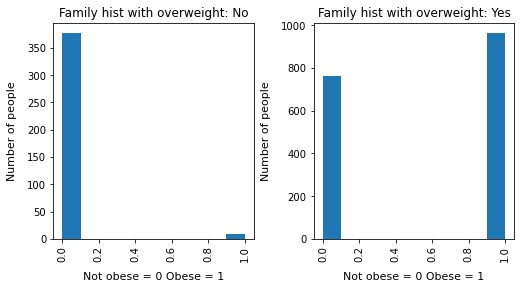

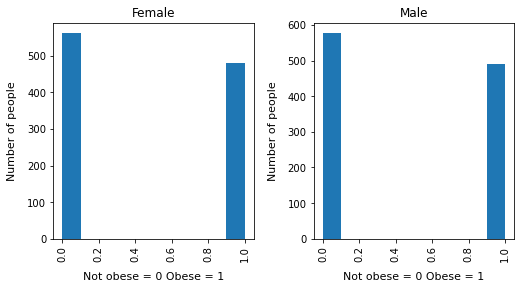

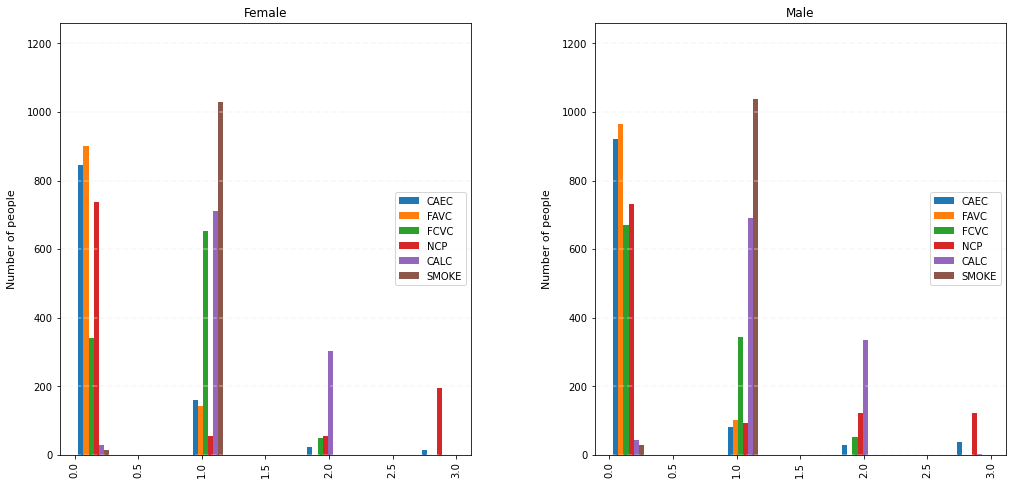

In [14]:
# Analysing correlation between features and the label with graphs 

# Graph 1: Feature 'family_history_with_overweight', the most correlated

classes_ob = ['Not obese', 'Obese']
obesity_num["Obesity"] = obesity_num["label"].map(dict(zip(range(0,2), classes_ob)))
a_values_f = ['Family hist with overweight: Yes', 'Family hist with overweight: No']
obesity_num['family_hist_with_overweight'] = obesity_num['family_history_with_overweight'].map(dict(zip(range(len(a_values_f)), a_values_f)))

att_plot = obesity_num.hist(column = ['label'], by= 'family_hist_with_overweight', figsize= (8,4))
for x in att_plot:
    x.set_xlabel("Not obese = 0 Obese = 1",labelpad=10, size=11)
    x.set_ylabel("Number of people", labelpad=10,  size=11)

# Graph 2: Feature 'Gender', the least correlated

a_values_g = ['Male', 'Female']
obesity_num['Gender_'] = obesity_num['Gender'].map(dict(zip(range(len(a_values_g)), a_values_g)))

att_plot1 = obesity_num.hist(column = ['label'], by= 'Gender_', figsize= (8,4))
for x in att_plot1:
    x.set_xlabel("Not obese = 0 Obese = 1",labelpad=10, size=11)
    x.set_ylabel("Number of people", labelpad=10,  size=11)

# Graph 3: Analysing correlation between feature 'Gender' and other features

att_plot2 = obesity_num.hist(column = ['CAEC', 'FAVC', 'FCVC', 'NCP', 'CALC', 'SMOKE'], by= 'Gender_', layout =(1, 4), figsize= (35,8), legend = True)
for x in att_plot2:
    x.set_ylabel("Number of people", labelpad=10,  size=11)
    
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    

**BANK MARKETING**

In [15]:
# Calculating MI

bank_marketing_num, mic_bank_marketing, num_assigned_bn = MI('bank-marketing.csv')
print('MI for Bank Marketing features in descendent order:', *mic_bank_marketing, sep='\n') 

MI for Bank Marketing features in descendent order:
{'poutcome': 0.0260492772196059}
{'month': 0.02072607022014162}
{'contact': 0.011322562767190611}
{'job': 0.006925135731114565}
{'housing': 0.005425480697534818}
{'loan': 0.002850843525016744}
{'marital': 0.0020604052361896663}
{'education': 0.001639668161485034}
{'default': 8.418704743398675e-07}


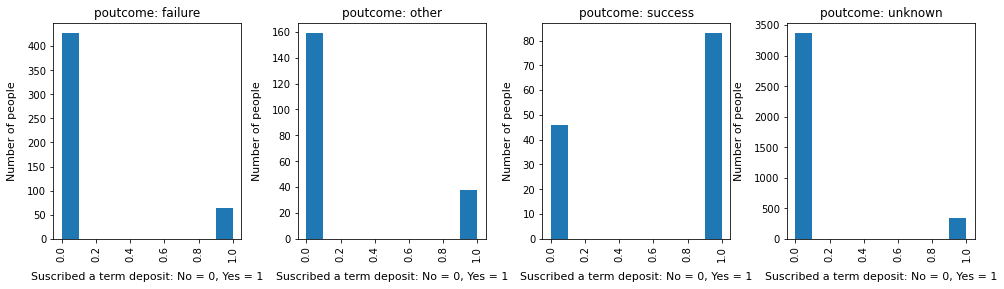

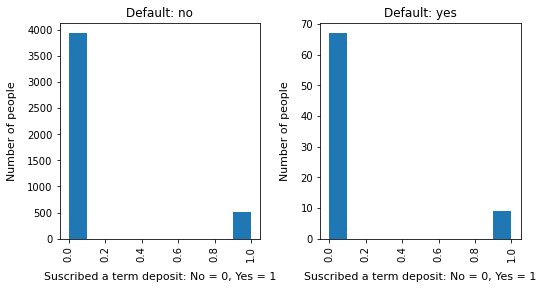

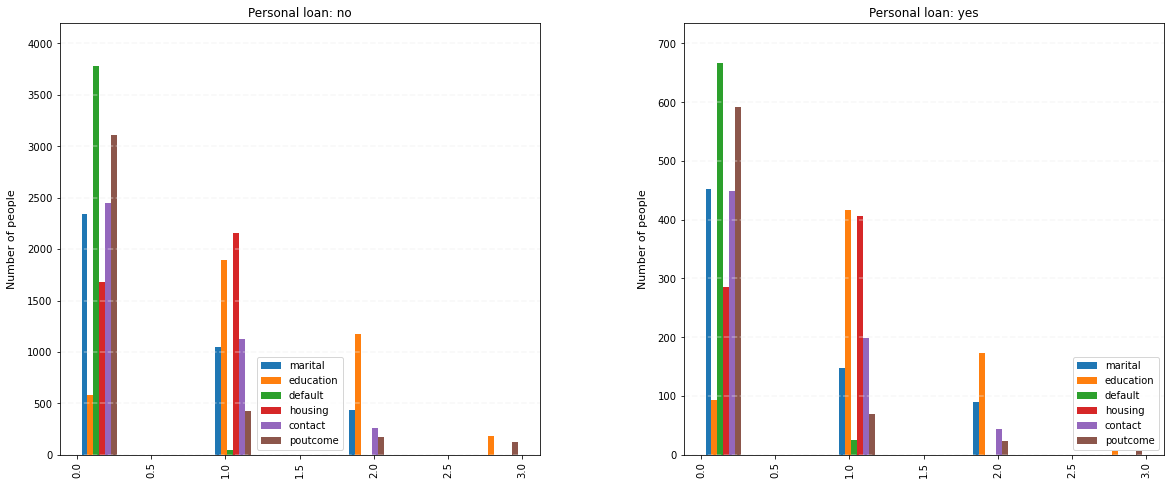

In [16]:
# Analysing correlation between features and classes

# Graph 1: Feature 'poutcome' , the most correlated 

classes_bm = ['No', 'Yes']
bank_marketing_num["Subscribed_a_term_deposit"] = bank_marketing_num["label"].map(dict(zip(range(len(classes_bm)), classes_bm)))
a_values_po = ['poutcome: unknown', 'poutcome: failure', 'poutcome: other', 'poutcome: success']
bank_marketing_num['Previous_mkt_campaign_outcome'] = bank_marketing_num['poutcome'].map(dict(zip(range(len(a_values_po)), a_values_po)))

att_plot3 = bank_marketing_num.hist(column = ['label'], by= 'Previous_mkt_campaign_outcome', layout =(1, 4),  figsize= (16,4))
for x in att_plot3:
    x.set_xlabel("Suscribed a term deposit: No = 0, Yes = 1",labelpad=10, size=11)
    x.set_ylabel("Number of people", labelpad=10,  size=11)
    
# Graph 2: Feature 'default' , the least correlated 

a_values_def = ['Default: no', 'Default: yes']
bank_marketing_num['Has_credit_in_default'] = bank_marketing_num['default'].map(dict(zip(range(len(a_values_def)), a_values_def)))

att_plot4 = bank_marketing_num.hist(column = ['label'], by= 'Has_credit_in_default', figsize= (8,4))

for x in att_plot4:
    x.set_xlabel("Suscribed a term deposit: No = 0, Yes = 1",labelpad=10, size=11)
    x.set_ylabel("Number of people", labelpad=10,  size=11)

# Graph 3: Analysing correlation between feature 'loan' and other features

a_values_lo = ['Personal loan: no', 'Personal loan: yes']
bank_marketing_num['Personal_loan'] = bank_marketing_num['loan'].map(dict(zip(range(len(a_values_lo)), a_values_lo)))

att_plot5 = bank_marketing_num.hist(column = ['marital', 'education', 'default', 'housing', 'contact', 'poutcome'], by= 'Personal_loan', layout =(1, 3), figsize= (30,8), legend = 'True')
for x in att_plot5:
    x.set_ylabel("Number of people", labelpad=10,  size=11)
    
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

**Answer to Question 3.a**

Obesity Dataset:

The feature that is the most correlated with the label is 'family_history_with_overweight' with a MI value of 0.11, followed by 'CAEC' (0.08), meaning they are good predictors, while 'Gender'(MI=0.000001) is not. The histograms confirm the correlations, in the graphs of 'family_history_with_overweight', the frequencies of classes are different for each feature value, it means there is a relationship. People who has family history with overweight with family are more likely to be obese, while people who don't have family history with overweight are much less likely to be obese. Meanwhile, in the graphs from 'Gender', we can see that the distribution from Males and Females don't differ much, so the realtionship is very weak between 'Gender' and 'label', it means both are almost equally likely to be obese, so this is not a useful feature. We can also see some correlations bewtween features, such as 'Gender' and 'FCVC', while 'SMOKE' is not correlated with 'Gender'.


Bank Marketing Dataset:

The highest MI is 0.026 from 'poutcome',  and the lowest is 'default' with 8.4e-7. For 'poutcome' we can see that the distribution of its feature vvalues look somewhat similar except for 'success' which looks very different from the rest, so it confirms that there is a relationship between 'poutcome' and the label. This feature could be useful as a predictor, we can say that if the outcome of previous campaign has been successful is more likely that people subscribed a term deposit, but if the it has failed or had other outcome, it is less likely that people subscribed a term deposit. In the 'Default' graphs, we can see clearly that both  have similar distribution, thus there is a very weak relationship between having credit in default and people subscribing a term deposit. In the last graph we can appreciate that features look to have similar distributions with 'loan' (weak relationships), but there still some dependencies, for example with 'marital' saying single people (value:1) are less likely to have a personal loan than married or divorced people.

**Answer to Question 3.b**

The 'naivety' assumption of NB states that the features are conditionally independent given the class, it is necessary because it let us use the Bayes Rule to calculate the  probabilities for each class and classify an instance which reduces complexity, because if this assumption is not held probabilities would be much harder to calculate. 
However, it could be problematic because this assumption doesn't reflect the real world. Normally dependencies between variables exist, as we can see in our datasets,for example in Obesity we can see that females are more likely to eat more frequent vegetables than males, this means there is dependency between Gender and Frequency of eating vegetables, also in student we can assume a pretty obvious dependency between 'address' and 'travel time'. So NB could be considered a non-realistic model, nevertheless, in practice it works good because dependecies working together lead to good results, and if not they cancell each other reducing the impact in the predictions, leading again to good results.  

### Question 4: Feature Selection and Ethics

As machine learning practitioners, we should be aware of possible ethical considerations around the applications we develop. The classifier you developed in this assignment could for example be used to classify college applicants into admitted vs not-admitted – depending on their predicted grade in the Student dataset.

a) Discuss ethical problems which might arise in this application and lead to unfair treatment of the applicants. Ground your discussion in the set of features provided in the student data set.

b) Remove all ethically problematic features from the data set (use your own judgment), and train your Naive Bayes classifier on the resulting data set. How does the performance change in comparison to the full classifier?

c) The approach to fairness we have adopted is called “fairness through unawareness” – we simply deleted any questionable features from our data. Is removing all problematic features as done in part (b) guarantee a fair classifier? Explain Why or Why not?

In [17]:
# Taking the ethically problematic features out
new_student = student.loc[:, ['school', 'reason', 'studytime', 'failures', 'schoolsup', 'activities', 'nursery', 'higher', 'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'label']]

# Applying NB with CV to the new dataset
NB_with_CV (new_student, 10)


The average accuracy score with 10 folds is:  0.4482692307692308
The average error rate with 10 folds is:  0.5517307692307691
The average F1 score with 10 folds is:  0.43699649521745004


**Answer to Question 4.a**

If that is the case, there are some features in the student dataset that could be ethically problematict. For example features like sex, family size, parents status, guardian, family educational support and quality of family relationships which could lead to an unfair prediction since they refer to characteristics that shouldn't have bias in the final result, i.e. Females and Males should have equally opportunity to get admitted, as well as if they have any different situation with their families, student performance should be independent from family situations, even though they could be related. On the other hand, features like address, mothers education, fathers education, mothers job, fathers job, traveltime, extra paid classes, and internet access could have hidden relationships with the economic status of the students and their families, which again they shouldn't have any bias, since economic status should not be a predictor if a student is admittted or not to college.


**Answer to Question 4.b**

If we look at the results we can see that previously with all the features the F1-score using CV with 10 folds was 0.479, but when we took out the ethically problematic features the F1-score decreased to 0.437, this means that some the features that we took were good predictors (had a relationship with the label)  thus they were indeed having a bias in the prediction, so in this case, dents could have been admitted or not admitted to college under potential unfair circumstances. Nevertheless, correlation doesn't necessarily lead to causation, there are other factors that we have to consider that could lead to bias even after removing these ethical problematic features.


**Answer to Question 4.c**

I think applying "Fairness through awareness" doesn't guarantee a fair classifier because there are other factors tha may cause bias, for example people who label the data may have had some bias while doing it. Other factor is that normally and like we se ein this datasets, data is not balanced, they used to have errors or missing values and also we don't know if the training data is representing well the population, sometimes some samples and values are not randomly distributed so if the training data is not representative, no matter which classifier we use, the predictions will be not accurate. And other reason as we talk in the lectures, some training datatset could take into account past data that could have some bias leading to biased predictions, even if we apply cross-validation, if the past data is larger and had bias could still affect the prediction of current events.




   <b>Signed by</b>: Alejandra Victoria Abril Pareja
   
   <b>Dated</b>: 02/09/2022